In [1]:
%matplotlib inline

In [2]:
import eqcatalog

In [4]:
id_earth = 6625
[eq] = eqcatalog.rob.query_local_eq_catalog_by_id(id_earth)
eq.print_info()

+------------+--------------+
| Attribute  |    Value     |
+------------+--------------+
|     ID     |     6625     |
|    name    | KINROOI (BE) |
|    date    |  2018-05-25  |
|    time    |   22:43:27   |
|    lon     |    5.6872    |
|    lat     |    51.175    |
|   depth    |     16.6     |
|     ML     |     3.1      |
|    errt    |     0.33     |
|    errh    |     0.61     |
|    errz    |     0.5      |
|    errM    |     0.2      |
|   agency   |     ROB      |
| event_type |      ke      |
+------------+--------------+


In [8]:
dyfi = eq.get_macroseismic_enquiries(verbose=True)

SELECT * FROM web_input JOIN web_analyse ON web_input.id_web=web_analyse.id_web LEFT JOIN web_location ON web_input.id_web=web_location.id_web AND web_location.quality >= 6 WHERE web_analyse.id_earth = 6625 AND web_analyse.m_fiability >= 20.0 AND web_analyse.deleted = false


In [9]:
len(dyfi)

1691

In [17]:
all_dyfi = eqcatalog.rob.query_web_macro_enquiries('all', verbose=True)
print(len(all_dyfi))

SELECT * FROM web_input JOIN web_analyse ON web_input.id_web=web_analyse.id_web LEFT JOIN web_location ON web_input.id_web=web_location.id_web AND web_location.quality >= 6 WHERE web_analyse.id_earth > 0 AND web_analyse.m_fiability >= 20.0 AND web_analyse.deleted = false
32852


In [18]:
unlinked_dyfi = eqcatalog.rob.query_web_macro_enquiries(None)
print(len(unlinked_dyfi))

3942


In [21]:
unlinked_dyfi[-1].get_prop_values('time_day')

[18]

In [23]:
dyfi[-100:].get_unique_prop_values('asleep')

[u'0', u'1', u'2']

In [27]:
dyfi[-10:].get_elapsed_times().astype('m8[h]')

array([83, 83, 83, 86, 86, 87, 87, 89, 92, 97], dtype='timedelta64[h]')

In [39]:
subsel = dyfi.subselect_by_property('name', ["Kris Vanneste"])
print(subsel.get_prop_values('street'))

[u'Visserij 161/F', u'Visserij 161/F', u'Visserij 161', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'', u'']


In [40]:
dyfi[-10:].longitudes

array([5.7309, 5.7168,    nan, 5.5009, 5.4863, 5.5893,    nan,    nan,
          nan, 5.579 ])

In [41]:
dyfi[-10:].get_addresses()

[u'HOOGBAAN, 3650 DILSEN-STOKKEM, BE',
 u'KANTONS WEG 3, 3650 DILSEN-STOKKEM, BE',
 u'',
 u'WIESVELDLAAN 2 BUS 12, 3740 BILZEN, BE',
 u'BOVENSTRAAT, 3730 HOESELT, BE',
 u'VOSTERTSTRAAT 77, 3960 BREE, BE',
 u'',
 u'',
 u'',
 u'CAMPSTRAAT, 3670 GRUITRODE, BE']

In [42]:
dyfi[-10:].geocode('here')

[(), (), (), (), (), (), (), (), (), ()]

In [43]:
dyfi.set_locations_from_communes()

In [44]:
dyfi[-10:].longitudes

array([5.7309, 5.7168,    nan, 5.5009, 5.4863, 5.5893, 4.9086,    nan,
          nan, 5.579 ])

In [45]:
ensemble = dyfi.aggregate_by_commune('id_main')
print(ensemble.keys())

[0L, 1539L, 516L, 3926L, 6L, 4104L, 3756L, 61450L, 4109L, 526L, 61456L, 1554L, 2068L, 4118L, 536L, 3097L, 4635L, 4127L, 3106L, 4136L, 41L, 1071L, 3678L, 4150L, 570L, 2143L, 4669L, 1604L, 585L, 4173L, 3150L, 269L, 184L, 1878L, 4181L, 3671L, 94L, 607L, 4194L, 443L, 3690L, 112L, 3188L, 1148L, 2176L, 3204L, 1157L, 135L, 1679L, 658L, 664L, 1220L, 1186L, 1307L, 2724L, 166L, 3239L, 1479L, 2732L, 3247L, 3765L, 62136L, 3264L, 3780L, 2763L, 1232L, 209L, 3799L, 225L, 4834L, 911L, 1254L, 3281L, 235L, 3823L, 3828L, 894L, 2295L, 1784L, 3833L, 4859L, 256L, 3329L, 1283L, 62220L, 3341L, 3855L, 10000L, 788L, 3716L, 3355L, 287L, 1824L, 3875L, 3366L, 808L, 3881L, 299L, 3888L, 4006L, 309L, 4920L, 3727L, 1853L, 10047L, 833L, 10053L, 3809L, 1354L, 844L, 3896L, 3412L, 342L, 858L, 3931L, 865L, 3943L, 3815L, 1388L, 3950L, 3901L, 3957L, 374L, 3966L, 292223L, 4991L, 292229L, 3975L, 292232L, 3983L, 3475L, 3988L, 2456L, 3995L, 4001L, 421L, 3494L, 5031L, 3867L, 938L, 4014L, 1919L, 4021L, 73L, 955L, 4028L, 3402L, 403

In [52]:
import numpy as np
len(dyfi.subselect_by_property('felt', ['']))

110

In [53]:
dyfi.fix_felt_is_none()

In [54]:
len(dyfi.subselect_by_property('felt', ['']))

0

In [56]:
filtered_dyfi = dyfi.filter_floors(max_level=2)
print(filtered_dyfi.num_replies)

1630


#36840: 15 != 14.5
#37705: 15 != 14.5
#38225: 12 != 11.5
#38635: 14 != 13.5
#38820: 11 != 10.5
#39395: 13 != 12.5
#39550: 13 != 12.5
#39955: 11 != 10.5
#40260: 15 != 14.5
#41080: 14 != 11.0
#41240: 11 != 10.5
#41965: 10 != 9.5
#42060: 12 != 11.5
#42240: 16 != 18.0
#43375: 15 != 14.5
#44030: 40 != 39.5
#45560: 34 != 36.0


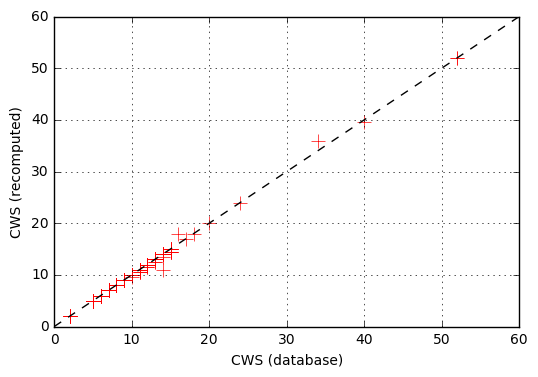

<eqcatalog.macrorecord.MacroseismicEnquiryEnsemble instance at 0x00000000238CFA88>

In [59]:
dyfi.plot_analysis_comparison(include_other_felt=False, include_heavy_appliance=True)

In [69]:
dyfi.bincount('heavy_appliance')

(array([ 0.,  1.,  2.,  3.,  4., nan]),
 array([1363.,    2.,    6.,    0.,    3.,  317.]))

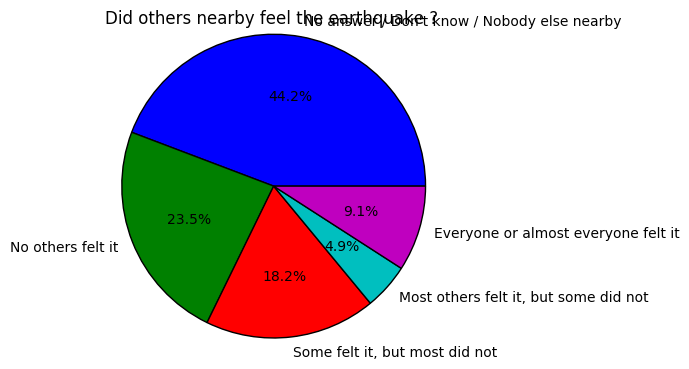

In [73]:
dyfi.plot_pie('other_felt')

In [75]:
dyfi.report_bincount('other_felt', include_labels=True)

+-------+-------------+---------------------------------------------+
| Value | Num records |                    Label                    |
+-------+-------------+---------------------------------------------+
|   0   |     748     | No answer / Don't know / Nobody else nearby |
|   1   |     398     |              No others felt it              |
|   2   |     308     |        Some felt it, but most did not       |
|   3   |      83     |    Most others felt it, but some did not    |
|   4   |     154     |     Everyone or almost everyone felt it     |
+-------+-------------+---------------------------------------------+


In [76]:
dyfi.report_by_commune('id_main')

E:\Home\_kris\Python\seismo\eqcatalog\macrorecord.py:1436: RuntimeWarning: divide by zero encountered in log
  cii = 3.40 * np.log(cws) - 4.38


+----------------------------+--------+-------------+----------+----------------+
|          Commune           |   ID   | Num replies | Mean CII | Aggregated CII |
+----------------------------+--------+-------------+----------+----------------+
|  AALST (OOST-VLAANDEREN)   |  1784  |      1      |   2.2    |      2.0       |
|           ALKEN            |  4045  |      13     |   2.4    |      2.0       |
|            AMAY            |  3097  |      1      |   1.0    |      1.0       |
|          ANDENNE           |  4834  |      2      |   2.7    |      2.0       |
|            ANS             |  3239  |      3      |   3.3    |      2.8       |
|         ANTWERPEN          |   6    |      1      |   2.2    |      2.0       |
|          ANZEGEM           |  1479  |      1      |   1.0    |      1.0       |
|             AS             |  3809  |      28     |   2.2    |      2.2       |
|            ASSE            |  536   |      1      |   2.7    |      2.0       |
|         AUDERG

C:\Anaconda\lib\site-packages\numpy\ma\core.py:5155: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
E:\Home\_kris\Python\seismo\eqcatalog\macrorecord.py:1366: RuntimeWarning: Mean of empty slice.
  damage_index = ensemble.calc_damage_index().mean()
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [80]:
dyfi[-10:].evaluate_cws_calculation(aggregate=True)

felt:
  Values: [1 1 0 1 1 1 1 1 1 1]
  Felt index (without other_felt) [x5]: 4.5
other_felt:
  Values: [2 2 0 2 2 2 0 0 4 0]
  Felt index (incl. other_felt) [x5]: 3.38
motion:
  Values: [2 2 -- 2 1 2 1 1 1 2]
  Motion index [x1]: 1.5555555555555556
reaction:
  Values: [3 -- -- 1 3 2 1 3 1 3]
  Reaction index [x1]: 2.125
stand:
  Values: [0 -- -- 0 0 0 0 -- 0 0]
  Stand index [x2]: 0.0
shelf:
  Values: [1 -- -- 1 0 0 0 1 0 --]
  Shelf index [x5]: 0.0
picture:
  Values: [0 -- -- 0 0 0 0 -- 0 --]
  Picture index [x2]: 0.0
furniture:
  Values: [0 -- -- 0 0 0 0 -- 0 0]
  Furniture index [x3]: 0.0
  Furniture index (incl. heavy_appliance) [x3]: 0.0
damage:
  Values: [u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------', u'*-------------']
  Damage index [x5]: 0.0
CWS:
  Database: 7.6
  Recomputed: 7.060555555555555


In [81]:
dyfi.find_duplicate_addresses()

Duplicate streets:
  3700 [CII=1.0, fiab=90] Ilse Simenon - Necropolisstraat 7 Tongeren
  3700 [CII=3.44879, fiab=90] Ilse Simenon - Necropolisstraat 7 Tongeren

  3950 [CII=1.0, fiab=90] Tom Adriaensen - Reppelerweg 34
  3950 [CII=1.0, fiab=90] Tom Adriaensen - Reppelerweg 34

  3770 [CII=2.6901, fiab=90] Jonah Fastr? - Dorpsstraat 75
  3770 [CII=2.6901, fiab=90] Jonah Fastr? - Dorpsstraat 75

  3570 [CII=2.6901, fiab=90] Frederix Nicole - ZEVENBOOMKENSSTRAAT 2 bus 11
  3570 [CII=2.6901, fiab=90] Frederix Nicole - ZEVENBOOMKENSSTRAAT 2 bus 11

  3700 [CII=2.0, fiab=90] Digneffe - A.meesenlaan 10
  3700 [CII=2.0, fiab=90] Digneffe - A.meesenlaan 10

  4260 [CII=1.0, fiab=90] Dehout - rue de l'O N U, 3
  4260 [CII=1.0, fiab=90] Dehout - rue de l'O N U, 3

  3800 [CII=2.0, fiab=90] Royen Nele - Barettestraat 4
  3800 [CII=2.0, fiab=90] Royen Nele - Barettestraat 4

  3680 [CII=2.6901, fiab=90] Schepers Werner - Venlosesteenweg 71
  3680 [CII=2.6901, fiab=90] Timo Schepers - Venlosesteenw

[[135, 148],
 [201, 202],
 [232, 236],
 [235, 250],
 [327, 328],
 [359, 382],
 [406, 407],
 [427, 784],
 [493, 496],
 [693, 694],
 [736, 737, 738],
 [793, 825],
 [940, 941],
 [949, 951],
 [963, 966],
 [975, 1597],
 [1099, 1163],
 [1150, 1151],
 [1192, 1194],
 [1475, 1476],
 [1509, 1510],
 [1514, 1517],
 [1550, 1551]]

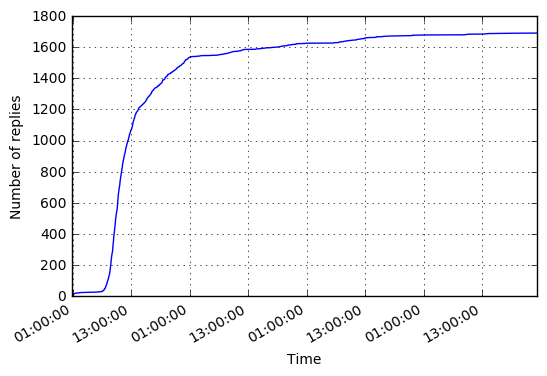

In [82]:
dyfi.plot_cumulative_responses_vs_time()

In [84]:
len(dyfi.get_inconsistent_damage_records())

0

In [85]:
eqcatalog.plot.plot_web_macroseismic_map?